# Modeling - Regression with Elastic Net (Baseline)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from linearmodels.panel import PanelOLS
import os
import seaborn as sns
import statsmodels.api as sm
from itertools import product
from sklearn.linear_model import ElasticNet
import pickle

In [2]:
df_train = pd.read_pickle("cleaned_train_dataset.pkl")
df_valid = pd.read_pickle("cleaned_validation_dataset.pkl")

In [3]:
display(df_train.head(3))
print("Shape: ", df_train.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
2,2021-01-09,10001,30.564677,31.671570,3.529032,62.536156,61.541969,26.712798,48.027841,36.151320,...,5.692845,29.742181,14.161936,12.418520,31.979435,91.884639,8.088518,Delaware,Kent,Saturday
3,2021-01-10,10001,28.771539,30.455099,3.386760,63.258488,59.657602,28.732035,48.997453,36.207953,...,5.721060,31.253956,12.912095,12.667990,32.232582,92.625535,7.548629,Delaware,Kent,Sunday
4,2021-01-11,10001,27.648192,32.652473,2.836477,64.020938,62.971697,28.824431,49.233749,34.277144,...,5.081410,34.085365,12.258112,14.202718,32.396997,94.077965,7.615596,Delaware,Kent,Monday


Shape:  (9349, 22)


In [4]:
display(df_valid.head(3))
print("Shape: ", df_valid.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,39.865526,...,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent,Saturday
1,2021-01-31,10001,33.567386,16.823052,3.810319,68.516498,65.308174,23.597192,66.300500,43.130462,...,22.165295,27.032093,13.656526,7.257635,27.500973,95.135350,11.917033,Delaware,Kent,Sunday
2,2021-02-01,10001,33.480379,15.760475,3.721566,68.230689,67.154670,22.022345,64.292646,41.938130,...,21.963030,28.219770,12.454998,5.645630,27.786762,94.550634,10.582422,Delaware,Kent,Monday


Shape:  (3010, 22)


In [5]:
target_var = 'smoothed_wcovid_vaccinated'
list_features = [col for col in df_train.columns if col not in ["time_value",'geo_value','state','county_name'
                                                                ,'day_of_week','day','week_of_month','State'
                                                                ,'County Name','day_of_week'
                                                                ,target_var]]

In [6]:
list_all_faeture = list_features.copy()
list_all_faeture.append("constant")
df_train['constant'] = 1.0
df_valid['constant'] = 1.0

In [7]:
list_alpha = [0.01, 0.1, 1.0, 10]
list_l1_ratio = [0.1, 0.5, 0.9]
results = []

combinations = list(product(list_alpha, list_l1_ratio))
for alpha, l1_ratio in combinations:
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=88)
    model.fit(df_train[list_all_faeture], df_train[target_var])
    y_pred = model.predict(df_valid[list_all_faeture])
    rmse = root_mean_squared_error(df_valid[target_var], y_pred)
    results.append({
        'alpha': alpha,
        'l1_ratio': l1_ratio,
        'RMSE': rmse
    })
df_results = pd.DataFrame(results).sort_values('RMSE').reset_index(drop = True)
display(df_results)

,alpha,l1_ratio,RMSE
0,0.01,0.1,6.657340
1,0.01,0.5,6.660391
2,0.01,0.9,6.663142
3,0.10,0.1,6.672126
4,0.10,0.5,6.699372
5,0.10,0.9,6.723685
6,1.00,0.1,6.786831
7,1.00,0.5,6.981021
8,1.00,0.9,7.157055
9,10.00,0.1,7.485198


In [8]:
best_row = df_results.loc[df_results['RMSE'].idxmin()]
best_alpha = best_row['alpha']
best_l1_ratio = best_row['l1_ratio']

print(f"Best alpha: {best_alpha}, Best l1_ratio: {best_l1_ratio}")

Best alpha: 0.01, Best l1_ratio: 0.1


In [9]:
best_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=88)
best_model.fit(df_train[list_all_faeture], df_train[target_var])

ElasticNet(alpha=np.float64(0.01), l1_ratio=np.float64(0.1), random_state=88)

In [10]:
with open('regression_model_baseline.pkl', 'wb') as f:
    pickle.dump(best_model, f)

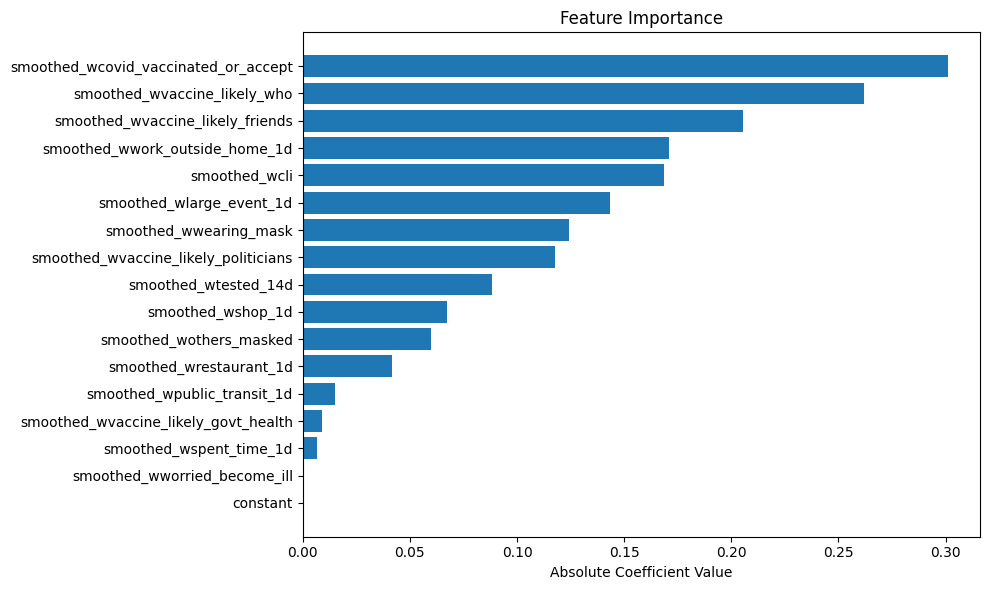

In [11]:
coef_df = pd.DataFrame({
    'Feature': list_all_faeture,
    'Coefficient': best_model.coef_
})

coef_df['AbsCoef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['AbsCoef'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
pred_y_train = best_model.predict(df_train[list_all_faeture])
train_rmse = root_mean_squared_error(df_train[target_var], pred_y_train)

print(f"Train RMSE: {train_rmse:.4f}")

Train RMSE: 3.8323


In [13]:
pred_y_valid = best_model.predict(df_valid[list_all_faeture])
valid_rmse = root_mean_squared_error(df_valid[target_var], pred_y_valid)

print(f"Test RMSE: {valid_rmse:.4f}")

Test RMSE: 6.6573


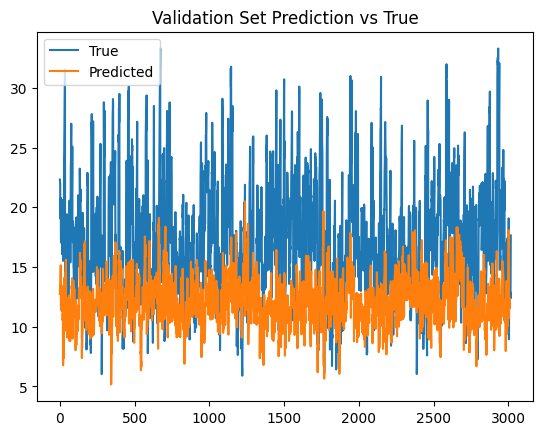

In [14]:
import matplotlib.pyplot as plt

plt.plot(df_valid[target_var], label="True")
plt.plot(pred_y_valid, label="Predicted")
plt.title("Validation Set Prediction vs True")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Residual Distribution')

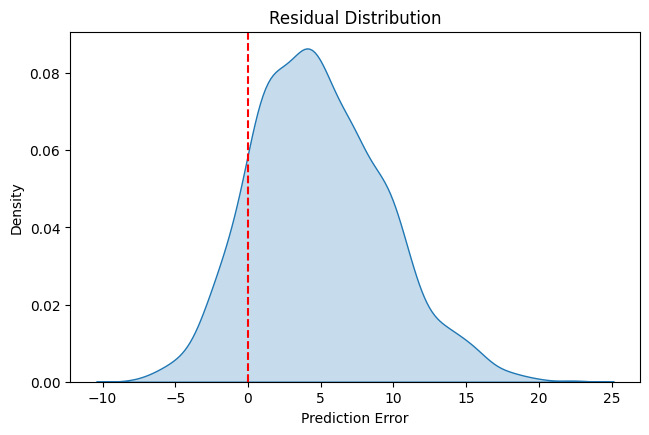

In [15]:
plt.figure(figsize=(25, 10))
plt.subplot(234)
sns.kdeplot(df_valid[target_var] - pred_y_valid, 
            label='Residual', fill=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Residual Distribution')